# Prepare Environment

In [37]:
import numpy as np
import math, copy
import matplotlib
import matplotlib.pyplot as plt

font = {'size' : 18}
matplotlib.rc('font', **font)

np.set_printoptions(precision=3)  # reduced display precision on numpy arrays

# Dataset

The following is the function to generate data, named `gen_data` based on $x^2$ function. The generated data will be added with random noise, in which the effect of noise is controlled by the `scale` input argument.

This function will be used through out this exercise as a mock-up dataset.

In [38]:
def gen_data(m, seed=1, scale=0.7):
    """ generate a data set based on a x^2 with added noise """
    c = 0
    x_train = np.linspace(0,49,m)
    np.random.seed(seed)  # for reproducibility
    y_ideal = x_train**2 + c
    y_train = y_ideal + (scale * y_ideal*(np.random.sample((m,))-0.5))
    x_ideal = x_train
    # Note: x_ideal, y_ideal --> x^2 line without noise
    #       x_train, y_train --> with noise
    return x_train, y_train, x_ideal, y_ideal

Let's generate 18 examples.

In [39]:
X, y, x_ideal, y_ideal = gen_data(18, 2, 0.7)

Plot the generated examples against its ideal value (i.e., before added noise). It should be noted that the `x_ideal` and `y_ideal` will be used throughout the exercise for visualization purpose ONLY. You MUST NOT use them to train and/or evaluate the model.

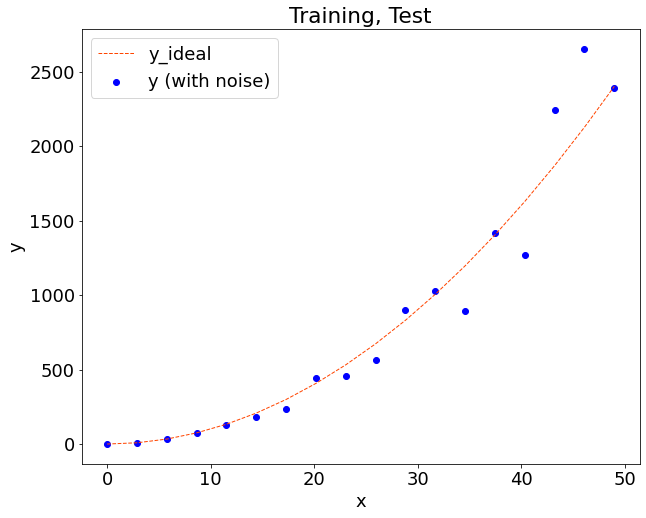

In [40]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.scatter(X, y, color = "blue", label="y (with noise)")
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, Test")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(loc='upper left')
plt.show()
plt.close('all')

## Split Train/Test

The following code shows an example of using [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from scikit-learn to split the dataset into train (67%) and test (33%) sets.

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1)

print(f"Training set: {X_train.shape} {y_train.shape}")
print(f"Test set: {X_test.shape} {y_test.shape}")

Training set: (12,) (12,)
Test set: (6,) (6,)


Let's plot the train and the test sets.

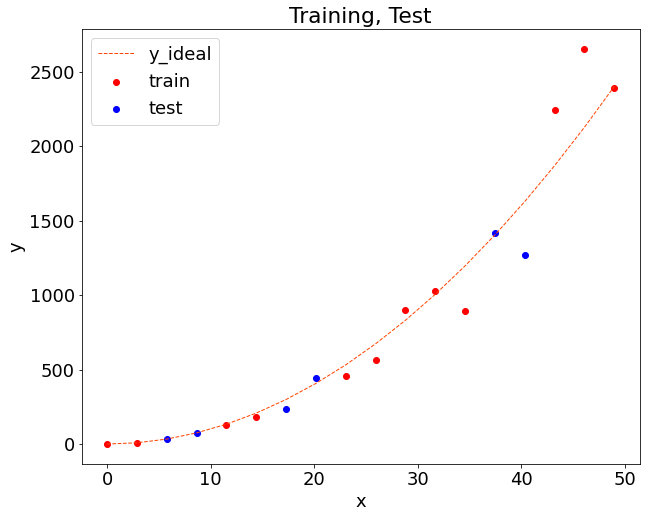

In [42]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, Test")
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",  label="train")
ax.scatter(X_test, y_test,   color = "blue", label="test")
ax.legend(loc='upper left')
plt.show()
plt.close('all')

# Linear Regression Model in Scikit-Learn

In this exercise, we will not use the linear regression model implemented in the previous lecture. We will instead use the `LinearRegression` model from scikit-learn. You can also replace the `LinearRegression` from the scikit-learn and use your own implementation from the previous exercises. This is optional and entirely up to you.

The following is the code to import model, feature-engineering, feature-scaling, and functions to quantify the errors from scikit-learn.

In [43]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler  # z-score normalization
from sklearn.preprocessing import PolynomialFeatures  # polynomial feature
from sklearn.metrics import mean_squared_error  # mean squared error

## Linear Regreesion with Polynomial Feature

Let's create a linear regression model with the polynomial features. First we need to create variables for a linear model, a polynomial feature generator, a feature scaler, regularization, standard erorr.

In scikit-learn library, the linear regression model can be created using the following classes:

* Linear Regression ([`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) in `sklearn`)
* Linear Regression with Regularization ([`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn-linear-model-ridge) in `sklearn`)

If you are interested in other models, see more in scikit-learn API ([link](https://scikit-learn.org/stable/modules/classes.html))

In [44]:
# Linear regression model
regularization = False
if regularization:
    reg_deg = 0.001  # or lambda in the equation
    linear_model = Ridge(alpha=reg_deg)  # with regularization
else:
    linear_model = LinearRegression()    # with out regularization

Next, we will generate the polynomial features and scale them using the Z-score normalization for all training examples.

The polynomial features and feature scaler can be created using the following module:

* PolynomialFeatures ([`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn-preprocessing-polynomialfeatures) in `sklearn`)
* Linear Regression with Regularization ([`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) in `sklearn`)

In [45]:
# Polynomial features
poly_deg = 10
poly = PolynomialFeatures(degree=poly_deg, include_bias=False)

# Feature scaling
scaler = StandardScaler()

# Generate polynomial features (`poly` also remember how to add poly feature)
# Note: Need reshape to add feature dimension from (m, ) to (m, 1)
#       poly module from scikit learn will remember how it add poly features
X_train_poly = poly.fit_transform(X_train.reshape(-1,1))

# Scale features (`scaler` also remember the scaling params)
# Note: scaler from scikit-learn will remember the scaling parameters
X_train_scaled_poly = scaler.fit_transform(X_train_poly)

Using the scikit-learn, the model training is simplified to a single function call, named `fit`.

In [46]:
linear_model.fit(X_train_scaled_poly, y_train)

LinearRegression()

The prediction can also be done in a single function call, named `predict`.

In [47]:
# Predict on training data, find training error
yhat = linear_model.predict(X_train_scaled_poly)

The scikit-learn library also provides the function to compute the errors. As we are working on the regression problem. We will use the mean-squared-error as a performance metric.

In [48]:
# Compute error
err_train = mean_squared_error(y_true=y_train, y_pred=yhat)

## Prediction

Next we will use the trained model for predicting the test set.

**IMPORTANT**: when we would like to apply the trained model to new examples such the test sets, we **MUST** make sure that the new examples are pre-processed in the same way as the training set.

As we use the PolynomialFeature and the StandardScaler from the scikit-learn, they already remembered the parameters for generating more features and scaling features (via `fit_transform` or `fit` function calls). We can simply use the `transform` function call to process the new examples in the same way as the training set.

In [49]:
# Predict on test data, find error
# Note: Need reshape to add feature dimension from (m, ) to (m, 1)
X_test_poly = poly.transform(X_test.reshape(-1,1))  # polynomial features
X_test_scaled_poly = scaler.transform(X_test_poly)  # feature scaling
yhat = linear_model.predict(X_test_scaled_poly)     # prediction

# Compute error
err_test = mean_squared_error(y_test, yhat)

Let's compare the errors from the training and the test sets.

In [50]:
print(f"training err {err_train:0.2f}, test err {err_test:0.2f}")

training err 116.02, test err 342430.02


In [51]:
# Plot predictions over data range to visialize the model function f(x)
_X = np.linspace(0,int(X.max()),100)  # predict values for plot
_X_poly = poly.transform(_X.reshape(-1,1))
_X_scaled_poly = scaler.transform(_X_poly)
_y_pred = linear_model.predict(_X_scaled_poly)

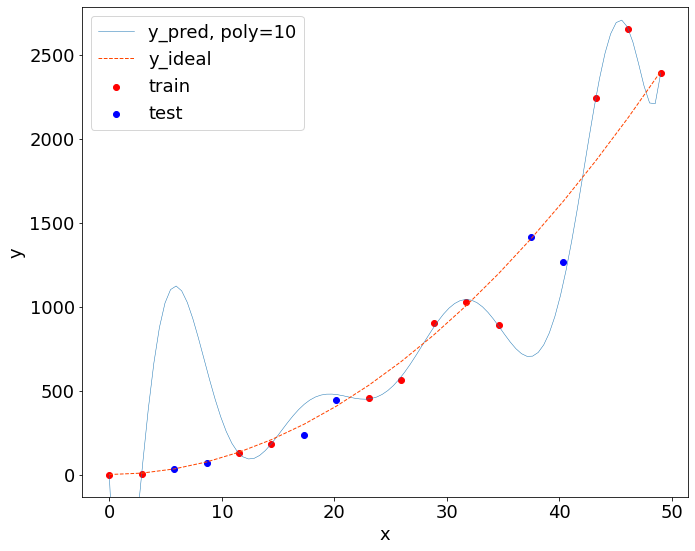

In [52]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",  label="train")
ax.scatter(X_test, y_test,   color = "blue", label="test")
ax.set_xlim(ax.get_xlim())
ax.set_ylim(ax.get_ylim())

# Visialize the model function f(x)
if regularization:
    ax.plot(_X, _y_pred,  lw=0.5, label=f"y_pred, poly={poly_deg} lambda={reg_deg}")
else:
    ax.plot(_X, _y_pred,  lw=0.5, label=f"y_pred, poly={poly_deg}")

ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.close('all')

Go back and toggle the `regularization` to see whether it helps reduce the errors.

## Custom Linear Regression Class

Let's package:

1. Linear regression model (with and without regularization)
1. Polynomial feature
1. Feature Scaling with StandardScaler

into a Python class as an easy-to-use module, named `LinearRegPolyModel`. This class will be used throughout this exercise.



In [53]:
class LinearRegPolyModel:

    def __init__(self, poly_deg, regularization=False, lambda_=0):
        if regularization:
            # with L2 regularization
            self.linear_model = Ridge(alpha=lambda_)
        else:
            # without regularization
            self.linear_model = LinearRegression()
        self.poly = PolynomialFeatures(poly_deg, include_bias=False)
        self.scaler = StandardScaler()

    def fit(self, X, y):
        # Reshape to add feature dimension from (m, ) to (m, 1)
        X_poly = self.poly.fit_transform(X.reshape(-1,1))
        X_poly_scale = self.scaler.fit_transform(X_poly)
        self.linear_model.fit(X_poly_scale, y_train)

    def predict(self, X):
        # Reuse `poly` and `scaler` from the fit (i.e, the training)
        X_mapped = self.poly.transform(X.reshape(-1,1))
        X_mapped_scaled = self.scaler.transform(X_mapped)
        yhat = self.linear_model.predict(X_mapped_scaled)
        return(yhat)

Let's test to create two models with and without regularization.

In [54]:
# Model
# TODO: Create a linear regression model with 10 polynomial degree 
#       without regularization
lmodel1 =  LinearRegPolyModel(poly_deg = 10) # YOUR CODE HERE 

# TODO: Create a linear regression model with 10 polynomial degree 
#       with regularization using lambda equal to 1e-3
lmodel2 =  LinearRegPolyModel(poly_deg =10,regularization=True,lambda_ = 1e-3)# YOUR CODE HERE 

# Train
lmodel1.fit(X_train, y_train)
lmodel2.fit(X_train, y_train)

Below is a function to make predictions on a range of examples from 0 to the maximum of values of the dataset. This is to visualize the model function $f(x)$ such that we can compare with the ground truth from the train/valid/test sets.

In [55]:
def predict_over_range(X, model):
    # Plot predictions over data range 
    _X = np.linspace(0,int(X.max()), 100)
    y_pred = model.predict(_X)
    return _X, y_pred

Plot the predictions from two models.

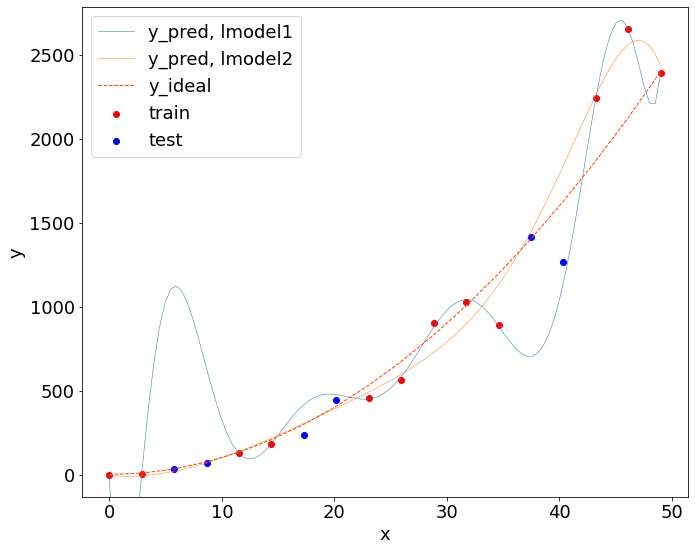

In [56]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",  label="train")
ax.scatter(X_test, y_test,   color = "blue", label="test")
ax.set_xlim(ax.get_xlim())
ax.set_ylim(ax.get_ylim())

# Predict over ranage for visialize the model function f(x)
X_range1, y_pred_range1 = predict_over_range(X, lmodel1)
X_range2, y_pred_range2 = predict_over_range(X, lmodel2)

ax.plot(X_range1, y_pred_range1,  lw=0.5, label=f"y_pred, lmodel1")
ax.plot(X_range2, y_pred_range2,  lw=0.5, label=f"y_pred, lmodel2")
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.close('all')

**Expected graph:**

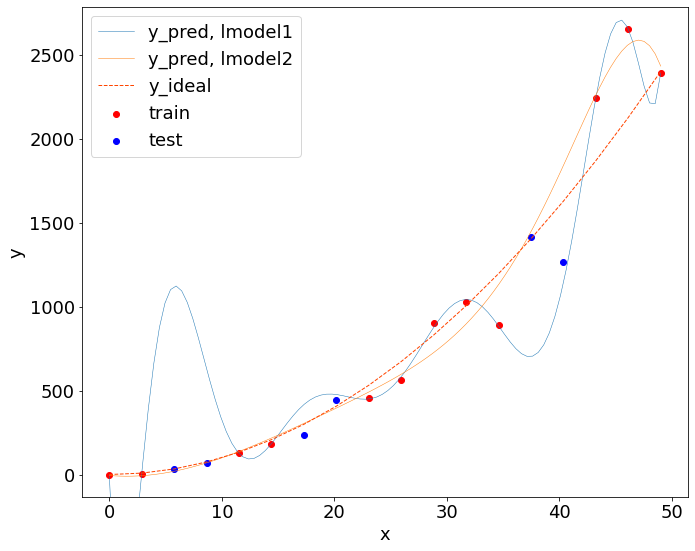

# Model Selection

As mentioned in the lecture, spliting the dataset into the training and test sets is still not a good practice for evaluating model performance. This is because the choice of hyperparameters of the best model was chosen using the test set. This may result in an optimistic estimate of the generalization error of the trained model.

A common practice in ML to evaluate the model is to instead use what is called **validation** set or **cross-validation (cv)** set. To do so, we split the available dataset into three sets: **training**, **validation**, and **test** sets.

The distribution of train, validation and test sets shown in the below table is a typical distribution, but can be varied depending on the amount of data available.

| data             | % of total | Description |
|------------------|:----------:|:---------|
| training         | 60         | Data used to tune model parameters $w$ and $b$ in training or fitting |
| validation | 20         | Data used to tune other model parameters like degree of polynomial, regularization or the architecture of a neural network.|
| test             | 20         | Data used to test the model after tuning to gauge performance on new data |


Let's generate three data sets below. We'll once again use `train_test_split` from `sklearn` but will call it twice to get three splits:

In [57]:
# Generate  data
X, y, x_ideal,y_ideal = gen_data(40, 5, 0.7)
print("X.shape", X.shape, "y.shape", y.shape)

# TODO: Split the data into the train, valid and test
# Hint: X_ and y_ are the temporary variables for further split into the valid
#       and the test sets
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.40, random_state=1)# YOUR CODE HERE
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.50, random_state=1)# YOUR CODE HERE

print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
print("X_cv.shape", X_cv.shape, "y_cv.shape", y_cv.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X.shape (40,) y.shape (40,)
X_train.shape (24,) y_train.shape (24,)
X_cv.shape (8,) y_cv.shape (8,)
X_test.shape (8,) y_test.shape (8,)


Visualize the three sets.

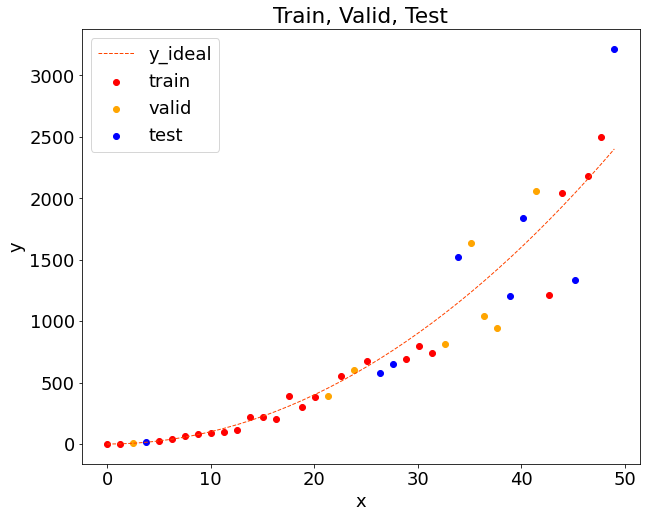

In [58]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Train, Valid, Test")
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",    label="train")
ax.scatter(X_cv, y_cv,       color = "orange", label="valid")
ax.scatter(X_test, y_test,   color = "blue",   label="test")
ax.legend(loc='upper left')
plt.show()
plt.close('all')

**Expected graphs:**

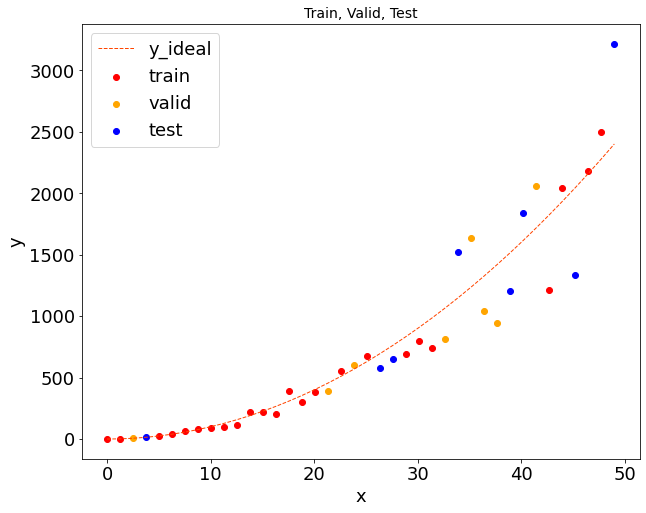

## Finding the optimal degree of polynomial features

Let's now vary the degree of polynomial to generate the plot for determining the underfitting and the overfitting. Let's train the model repeatedly, increasing the degree of the polynomial each iteration.

In [59]:
max_degree = 9
err_train = np.zeros(max_degree)    
err_cv = np.zeros(max_degree)      
x = np.linspace(0,int(X.max()),100)  
y_model_line = np.zeros((100,max_degree))  # columns are lines to plot

for degree in range(max_degree):
    lmodel = LinearRegPolyModel(degree+1)  # +1 to convert from 0-8 to 1-9
    lmodel.fit(X_train, y_train)
    y_preds = lmodel.predict(X_train)
    err_train[degree] = mean_squared_error(y_train, y_preds)
    y_preds = lmodel.predict(X_cv)
    err_cv[degree] = mean_squared_error(y_cv, y_preds)
    y_model_line[:,degree] = lmodel.predict(x)

Plot predictions from linear regression models with different degrees of polynomial.

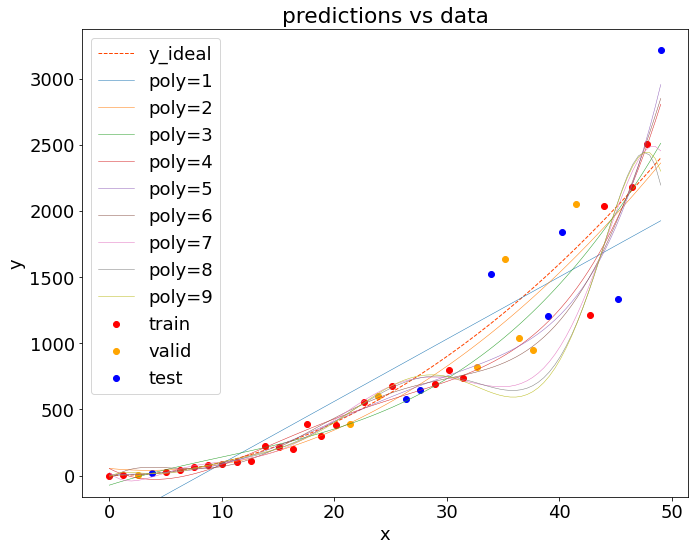

In [60]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.set_title("predictions vs data")
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",    label="train")
ax.scatter(X_cv, y_cv,       color = "orange", label="valid")
ax.scatter(X_test, y_test,   color = "blue",   label="test")
ax.set_xlim(ax.get_xlim())
ax.set_ylim(ax.get_ylim())

# Ideal line
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)

# Predict over ranage for visialize the model function f(x)
for i in range(max_degree):
    ax.plot(x, y_model_line[:,i], lw=0.5, label=f"poly={i+1}")
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.close('all')

On the **"predictions vs data"** plot, the solid lines represent the predictions from these models. A polynomial model with degree 1 produces a straight line that intersects very few data points, while the maximum degree hews very closely to every data point.

Note: You can try to reduce the number of prediction lines for a better visualization.

Next, let's plot the errors vs the degree of polynomial.

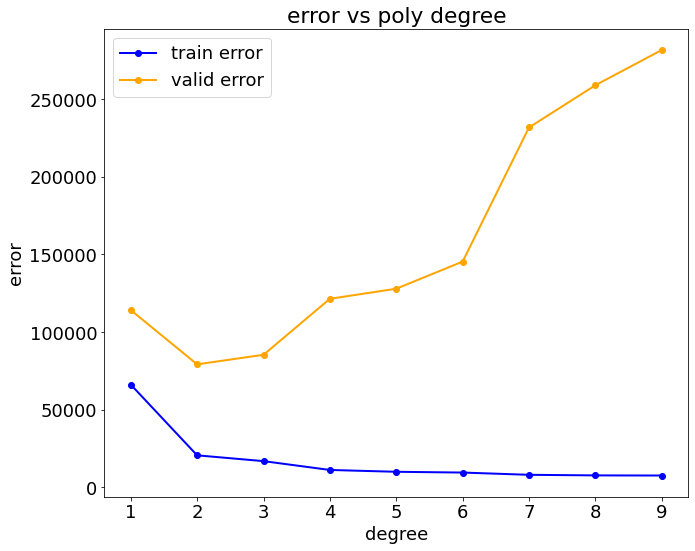

In [61]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

cpts = list(range(1, max_degree+1))
ax.plot(
    cpts, err_train, marker='o', label="train error", lw=2, color="blue")
ax.plot(
    cpts, err_cv,    marker='o', label="valid error", lw=2, color="orange")
ax.set_xlabel("degree")
ax.set_ylabel("error")
ax.legend()
ax.set_title("error vs poly degree")
plt.tight_layout()
plt.show()
plt.close('all')

On the **"error vs poly degree"** plot, the error on the trained data (blue) decreases as the model complexity increases, which is as expected. The error of the validation data decreases initially as the model starts to conform to the data, but then increases as the model starts to overfit on the training data (fails to *generalize*).

**TODO**: According to the **prediction vs data** and **error vs poly degree** plots. Which degree of polynomial is the best one?

Explain your answer below with the supporting evidence.

2 is degree of polynomial is the best because lenght between train error and valid error is lower most. 

**TODO**: Build the model using the best polynomial degree found and compute the mean squared error on the test set.

In [66]:
# TODO: Create a model in `lmodel`
lmodel = LinearRegPolyModel(poly_deg = 2)# YOUR CODE HERE

# TODO: Train the model
# YOUR CODE HE
lmodel.fit(X_train,y_train)

# TODO: Make predictions on the test set
y_preds = lmodel.predict(X_test)# YOUR CODE HERE

mse_test = mean_squared_error(y_test, y_preds)
print(f"MSE test: {mse_test:.4f}")

MSE test: 189670.3011


## Finding Optimal Regularization

As mentioned in the lecture, the regularization is a technique commonly used to **reduce overfitting**. Similar to polynomial degree, one can use the same methodology to identify the optimal regularization parameters, lambda ($\lambda$).

Please fill in the code below to use a fixed polynomial degree of 10 and varying the $\lambda$ of the regularization.

In [71]:
lambda_range = np.array([0.0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100])
num_steps = len(lambda_range)
degree = 10
err_train = np.zeros(num_steps)
err_cv = np.zeros(num_steps)
x = np.linspace(0,int(X.max()),100)
y_model_line = np.zeros((100,num_steps))  # columns are lines to plot

for i in range(num_steps):
    lambda_ = lambda_range[i]

    # TODO: Create a LinearRegPolyModel with the provided polynomial degree with
    #       an increasing lambda for each iteration.
    lmodel = LinearRegPolyModel(degree,regularization=True, lambda_=lambda_range[i])# YOUR CODE HERE

    # TODO: Fit the `lmodel` to the training set
    # YOUR CODE HERE
    lmodel.fit(X_train,y_train)
    # TODO: Use the trained `lmodel` to make prediction on the training set
    y_preds = lmodel.predict(X_train)# YOUR CODE HERE
    
    # Compute the error on the training set
    err_train[i] = mean_squared_error(y_train, y_preds)

    # TODO: Use the trained `lmodel` to make prediction on the validation set
    y_preds = lmodel.predict(X_cv)# YOUR CODE HERE

    # Compute the error on the validation set
    err_cv[i] = mean_squared_error(y_cv, y_preds)

    # Make predictions on the range of x for visualizing the model function
    y_model_line[:,i] = lmodel.predict(x)

Plot predictions from linear regression models with different degrees of regularization ($\lambda$).

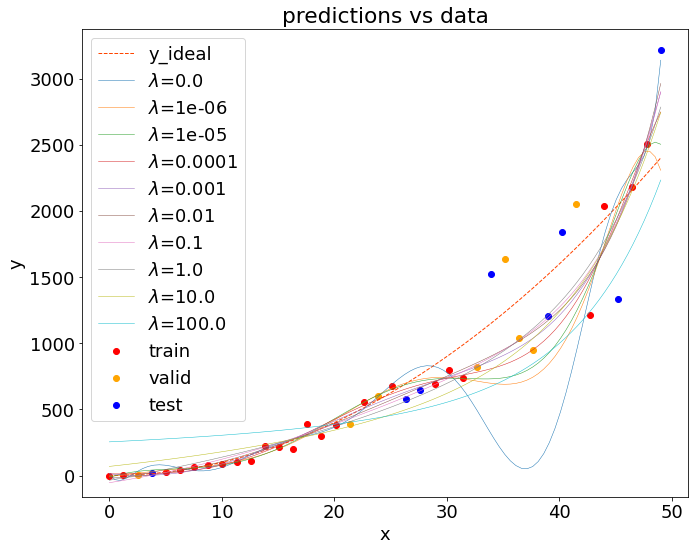

In [72]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.set_title("predictions vs data")
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",    label="train")
ax.scatter(X_cv, y_cv,       color = "orange", label="valid")
ax.scatter(X_test, y_test,   color = "blue",   label="test")
ax.set_xlim(ax.get_xlim())
ax.set_ylim(ax.get_ylim())

# Ideal line
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)

# Predict over ranage for visialize the model function f(x)
for i in range(num_steps):
    ax.plot(x, y_model_line[:,i], lw=0.5, label=f"$\lambda$={lambda_range[i]}")
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.close('all')

**Expected graphs:**

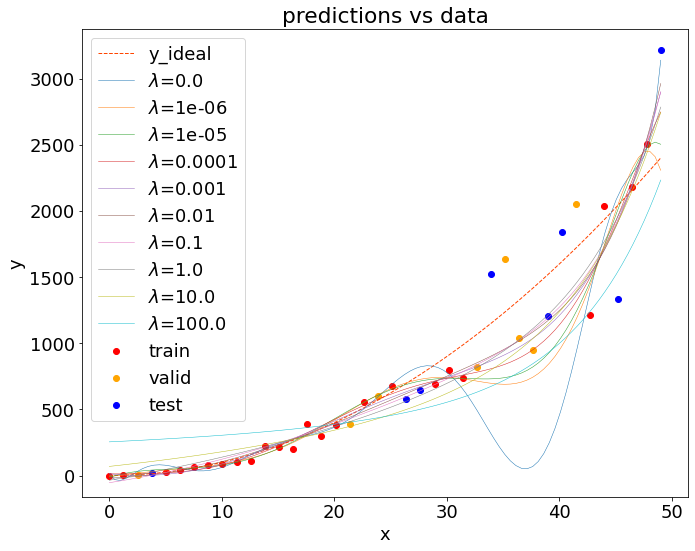

Note: You can try to reduce the number of prediction lines for a better visualization.

Next, let's plot the error vs regularization ($\lambda$).

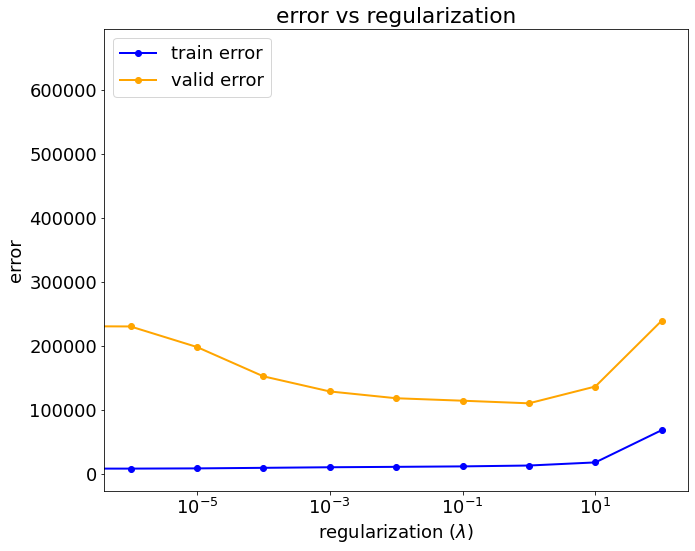

In [73]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.plot(
    lambda_range, err_train, marker='o', label="train error", lw=2, color="blue")
ax.plot(
    lambda_range, err_cv,    marker='o', label="valid error", lw=2, color="orange")
ax.set_xscale('log')
ax.set_ylim(*ax.get_ylim())
ax.set_xlabel("regularization ($\lambda$)")
ax.set_ylabel("error")
ax.legend(loc='upper left')
ax.set_title("error vs regularization")
plt.tight_layout()
plt.show()
plt.close('all')

**Expected graphs:**

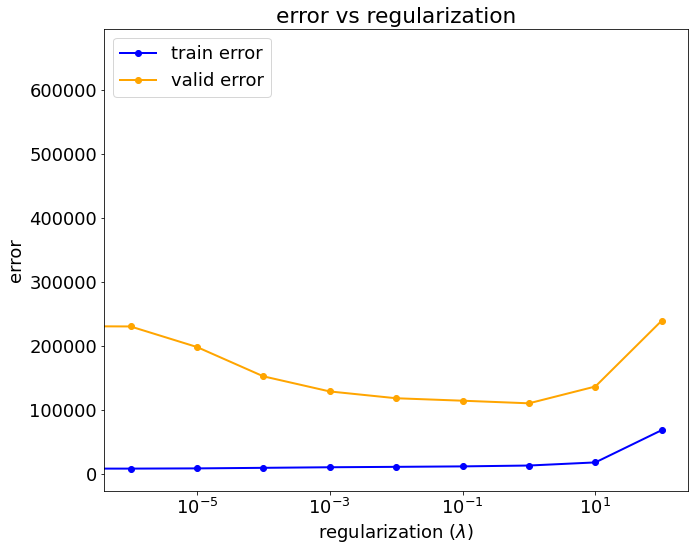

The **"error vs regularization"** plot shows that as regularization increases, the model moves from a overfitting (or high variance) model to a underfitting (high bias) model.

**TODO**: According to the **prediction vs data** and **error vs regularization** plots. Which $\lambda$ is the best one?

**Hint**: You may need to print out the $\lambda$ value according to the index that you choose. It can be difficult to determine the value based on manual visual inspection as the x-axis of the **error vs regularization** plot is in the log scale.

Explain your answer below with the supporting evidence.

1 is the best because length between train error and valid error is lowermost.

**TODO**: Build the model using the best $\lambda$ found and compute the mean squared error on the test set.

In [75]:
# TODO: Create a model in `lmodel`
lmodel = LinearRegPolyModel(poly_deg = 1)# YOUR CODE HERE

# TODO: Train the model
# YOUR CODE HERE
lmodel.fit(X_train,y_train)
# TODO: Make predictions on the test set
y_preds = lmodel.predict(X_test)# YOUR CODE HERE

mse_test = mean_squared_error(y_test, y_preds)
print(f"MSE test: {mse_test:.4f}")

MSE test: 288515.3112


# Getting more data: Increasing Training Set Size (m)

The following code start with the model with a high polynomial degree of 16 without regularization. For each iteration, it generates a new dataset with the number of examples equal to the current value of `m_range[i]`. Such dataset is then split into three sets: train (60%), valid (20%) and test (20%). These sets are then used to train and make predictions on the train and valid sets. As the value of `m_range[i]` increases at every iteration, it simulates the situation when we collect additional data. 

In [82]:
m = 50
m_range = np.array(m*np.arange(1,16))
num_steps = m_range.shape[0]
degree = 16
err_train = np.zeros(num_steps)
err_cv = np.zeros(num_steps)
y_model_line = np.zeros((100, num_steps))

for i in range(num_steps):
    # Generate the train/valid/test set according to the newly generate dataset
    X, y, x_ideal, y_ideal = gen_data(m_range[i], 5, 0.7)
    x = np.linspace(0,int(X.max()),100)

    # TODO: Split the data into the train, valid and test
    # Hint: X_ and y_ are the temporary variables for further split into
    #       the valid and the test sets
    X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.40, random_state=1)# YOUR CODE HERE
    X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.50, random_state=1)# YOUR CODE HERE
    
    # TODO: Create a LinearRegPolyModel with the provided polynomial degree
    #       without the regularization
    lmodel = LinearRegPolyModel(degree)# YOUR CODE HERE

    # TODO: Fit the `lmodel` to the training set
    # YOUR CODE HERE
    lmodel.fit(X_train,y_train)
    # TODO: Use the trained `lmodel` to make prediction on the training set
    y_preds = lmodel.predict(X_train)# YOUR CODE HERE

    # Compute the error on the training set
    err_train[i] = mean_squared_error(y_train, y_preds)

    # TODO: Use the trained `lmodel` to make prediction on the validation set
    y_preds = lmodel.predict(X_cv)# YOUR CODE HERE

    # Compute the error on the validation set
    err_cv[i] = mean_squared_error(y_cv, y_preds)

    # Make predictions on the range of x for visualizing the model function
    y_model_line[:,i] = lmodel.predict(x)

Plot predictions from linear regression models with different training set size (m).

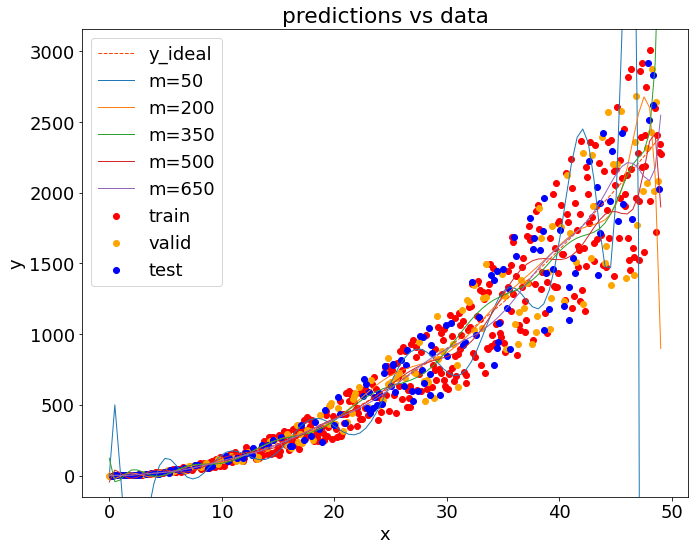

In [83]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.set_title("predictions vs data")
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",    label="train")
ax.scatter(X_cv, y_cv,       color = "orange", label="valid")
ax.scatter(X_test, y_test,   color = "blue",   label="test")
ax.set_xlim(ax.get_xlim())
ax.set_ylim(ax.get_ylim())

# Ideal line
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)

# Predict over ranage for visialize the model function f(x)
for i in range(0, num_steps, 3):
    ax.plot(x, y_model_line[:,i], lw=1, label=f"m={m_range[i]}")
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.close('all')

**Expected graphs:**

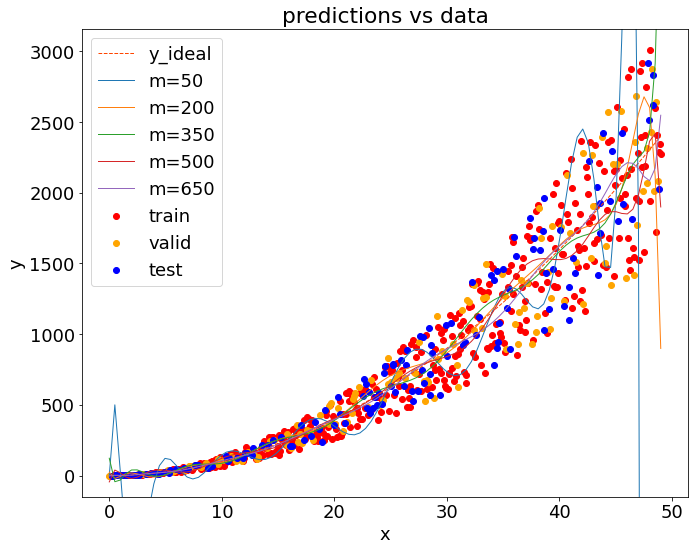

Next, let's plot the error vs number of examples (m).

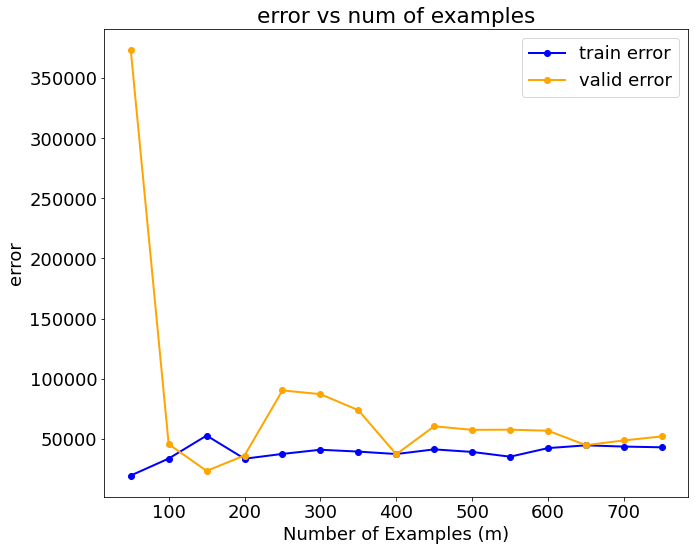

In [84]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

ax.plot(
    m_range, err_train, marker='o', label="train error", lw=2, color="blue")
ax.plot(
    m_range, err_cv,    marker='o', label="valid error", lw=2, color="orange")
ax.set_ylim(*ax.get_ylim())
ax.set_xlabel("Number of Examples (m)")
ax.set_ylabel("error")
ax.legend(loc='upper right')
ax.set_title("error vs num of examples")
plt.tight_layout()
plt.show()
plt.close('all')

**Expected graphs:**

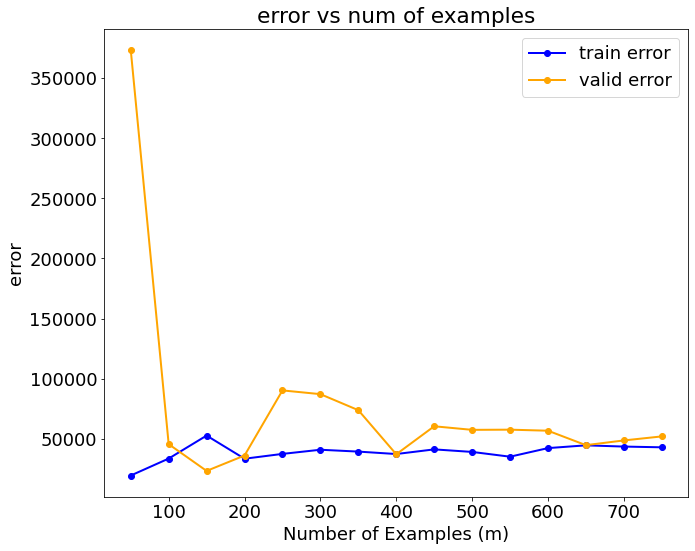

The **"error vs number of examples"** plot shows that as we collected more data (`m` increased), the train and validd losses decreased and converged to similar values.

**TODO**: According to the **prediction vs data** and **error vs number of examples (m)** plots. Please explain the effect of collecting additional data and what are the problems that it can help mitigate.

Explain your answer below with the supporting evidence.

plots 250 have the most lenght between train error and valid error, so it is the most error.
The effect of collecting additional data on a prediction model can depend on several factors, including the underlying relationship between the input variables and the target, the quality of the data, and the type of model being used.


More training data will not help reduce error if a learning algorithm is underfitting (or has a high bias).

evident, fllow in each graph
